# Partie C: Classification

- **Dataset**: Pima Indians Diabetes
- **Objectif**: Prédire la présence de diabète (étiquette binaire).

In [1]:
# Importation des librairies pour manipulation et visualisation des données
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des outils de prétraitement et séparation des données
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importation du modèle de classification
from sklearn.linear_model import LogisticRegression

# Importation des métriques d’évaluation pour classification
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)


# 1. Chargement:

Chargement de `diabetes.csv`

In [2]:
# Importation des données clients depuis le fichier CSV diabetes.csv
dataset = pd.read_csv('dataset/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. Nettoyage et prétraitement:

In [3]:
# 2. Nettoyage et prétraitement des données

colonnes = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    'Outcome'
]

# Colonnes où 0 n'est pas une valeur valide
colonnes_a_corriger = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Remplacer les 0 par NaN
for col in colonnes_a_corriger:
    dataset[col] = dataset[col].replace(0, pd.NA)

# Affichage des valeurs manquantes avant imputation
print("Valeurs manquantes avant imputation :")
print(dataset[colonnes_a_corriger].isna().sum().to_string())

# Imputation par la médiane, sans inplace pour éviter les warnings
for col in colonnes_a_corriger:
    mediane = dataset[col].median()
    dataset[col] = dataset[col].fillna(mediane)

# Affichage des valeurs manquantes après imputation
print("\nValeurs manquantes après imputation :")
print(dataset[colonnes_a_corriger].isna().sum().to_string())

# Colonnes à standardiser (exclure 'Pregnancies', 'DiabetesPedigreeFunction' et 'Outcome')
colonnes_a_standardiser = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Standardisation
scaler = StandardScaler()
dataset[colonnes_a_standardiser] = scaler.fit_transform(dataset[colonnes_a_standardiser])

# Affichage des premières lignes pour vérification
dataset.head()


Valeurs manquantes avant imputation :
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11

Valeurs manquantes après imputation :
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0


/tmp/ipykernel_157207/3497720132.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[col] = dataset[col].fillna(mediane)
/tmp/ipykernel_157207/3497720132.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[col] = dataset[col].fillna(mediane)
/tmp/ipykernel_157207/3497720132.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.627,1.425995,1
1,1,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,0.351,-0.190672,0
2,8,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.672,-0.105584,1
3,1,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,0.167,-1.041549,0
4,0,0.504422,-2.679076,0.670643,0.316566,1.549303,2.288,-0.020496,1


# 3. EDA et déséquilibre

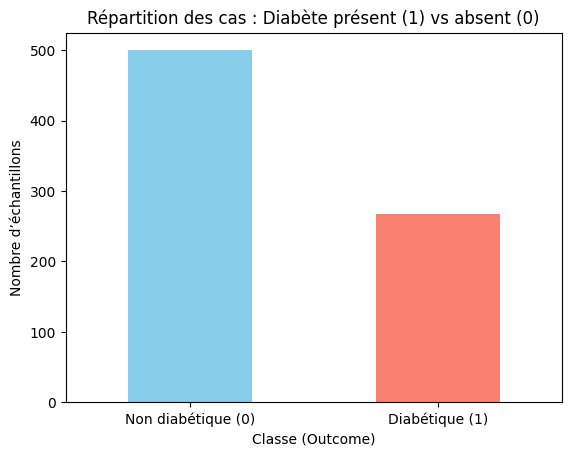

Statistiques descriptives globales :
                          count          mean       std       min       25%  \
Pregnancies               768.0  3.845052e+00  3.369578  0.000000  1.000000   
Glucose                   768.0  4.625929e-18  1.000652 -2.552931 -0.720163   
BloodPressure             768.0  5.782412e-18  1.000652 -4.002619 -0.693761   
SkinThickness             768.0 -1.526557e-16  1.000652 -2.516429 -0.467597   
Insulin                   768.0  1.503427e-17  1.000652 -1.467353 -0.222085   
BMI                       768.0  2.613650e-16  1.000652 -2.074783 -0.721209   
DiabetesPedigreeFunction  768.0  4.718763e-01  0.331329  0.078000  0.243750   
Age                       768.0  1.931325e-16  1.000652 -1.041549 -0.786286   
Outcome                   768.0  3.489583e-01  0.476951  0.000000  0.000000   

                               50%       75%        max  
Pregnancies               3.000000  6.000000  17.000000  
Glucose                  -0.153073  0.611265   2.542658 

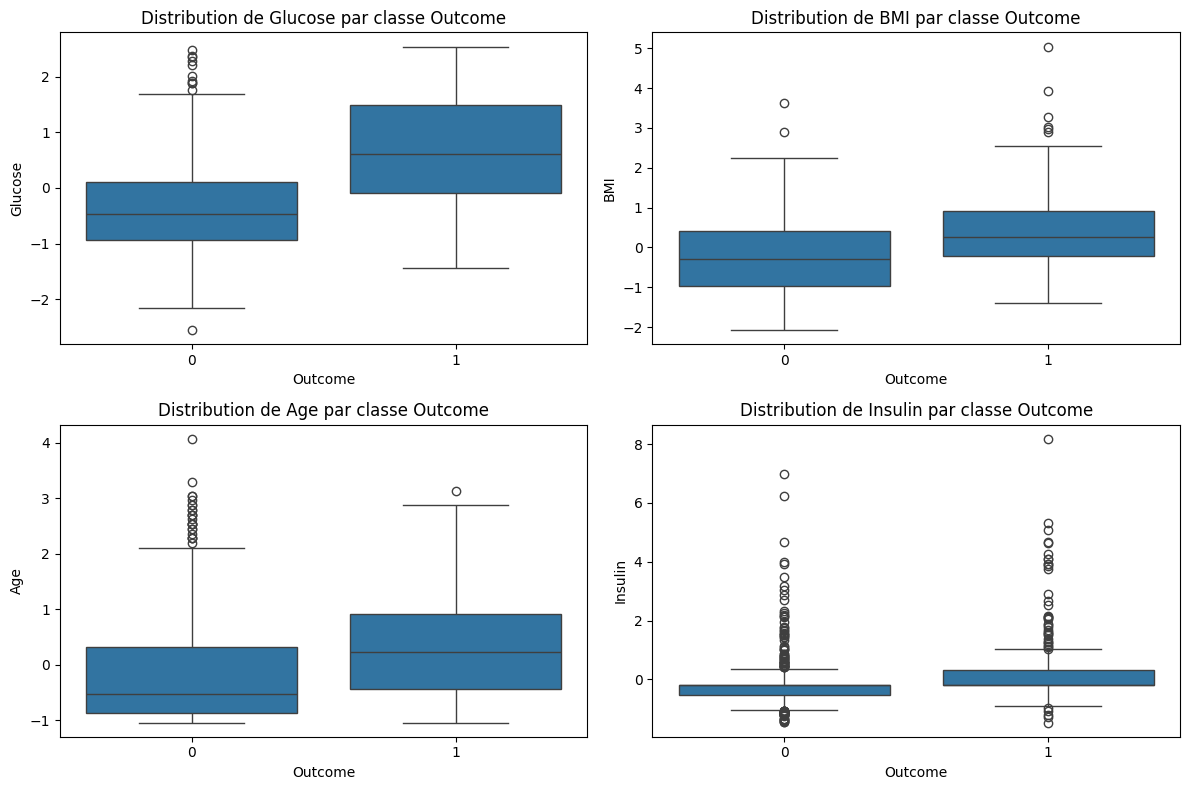

In [4]:
# 3. EDA et analyse du déséquilibre

# --- Visualisation du déséquilibre : Barplot du nombre d'exemples positifs et négatifs ---
count_pos_neg = dataset['Outcome'].value_counts()

count_pos_neg.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Répartition des cas : Diabète présent (1) vs absent (0)')
plt.xlabel('Classe (Outcome)')
plt.ylabel('Nombre d’échantillons')
plt.xticks(ticks=[0,1], labels=['Non diabétique (0)', 'Diabétique (1)'], rotation=0)
plt.show()


# --- Statistiques descriptives globales ---
print("Statistiques descriptives globales :")
print(dataset.describe().T)


# --- Statistiques descriptives par classe (Outcome) ---
print("\nStatistiques descriptives par classe :")
stats_par_classe = dataset.groupby('Outcome').describe().T
print(stats_par_classe)

# Optionnel : boxplots comparatifs des variables clés selon Outcome
variables_a_visualiser = ['Glucose', 'BMI', 'Age', 'Insulin']

plt.figure(figsize=(12, 8))
for i, col in enumerate(variables_a_visualiser, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Outcome', y=col, data=dataset)
    plt.title(f'Distribution de {col} par classe Outcome')
plt.tight_layout()
plt.show()


# 4. Split train/validation/test

In [5]:
# X contient toutes les colonnes sauf "Outcome"
X = dataset.drop('Outcome', axis=1)

# Y contient uniquement la colonne cible : "Outcome"
Y = dataset['Outcome']

In [6]:
# On garde 60% pour l'entraînement, et on met de côté 40% pour validation + test
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)

In [7]:
# Les 40% restants sont divisés équitablement entre validation et test (20% chacun)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
# Affichage des dimensions des datasets
print(f"Taille X_train : {X_train.shape}, y_train : {y_train.shape}")
print(f"Taille X_val   : {X_val.shape}, y_val   : {y_val.shape}")
print(f"Taille X_test  : {X_test.shape}, y_test  : {y_test.shape}")

Taille X_train : (460, 8), y_train : (460,)
Taille X_val   : (154, 8), y_val   : (154,)
Taille X_test  : (154, 8), y_test  : (154,)


# 5. Feature engineering / sélection:

In [9]:
# Initialisation du standardiseur
scaler = StandardScaler()

# Ajustement sur le train et transformation des sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


In [10]:
# On remet les données standardisées dans des DataFrames avec les mêmes noms de colonnes
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled_df   = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled_df  = pd.DataFrame(X_test_scaled, columns=X.columns)


In [11]:
# Aperçu des premières lignes pour chaque set
print("Train :")
display(X_train_scaled_df.head())

print("Validation :")
display(X_val_scaled_df.head())

print("Test :")
display(X_test_scaled_df.head())


Train :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.150892,-0.935306,-0.026002,0.022179,-0.166474,-0.003761,-0.623184,-0.689180
1,1.300081,0.082821,1.995534,0.022179,-0.166474,-0.003761,-0.691799,1.799628
2,-0.844520,-0.376978,1.153228,-1.150530,-0.166474,-0.329030,-0.946246,-0.860821
3,0.993710,2.414661,1.490150,0.022179,-0.166474,1.105114,-0.065688,0.683956
4,-0.538148,1.166634,1.490150,0.022179,-0.166474,-0.107255,0.946383,2.829479


Validation :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.687338,-0.639721,-0.531386,0.022179,-0.166474,-1.186560,-0.643197,-0.345896
1,-0.231777,-1.099520,0.142460,-1.502342,-0.617065,-0.284675,0.220208,0.426493
2,-1.150892,0.411249,1.827073,2.015785,0.058822,1.223394,-0.543133,-0.603359
3,0.074595,-0.212764,-0.026002,-1.971426,-0.594536,-1.511830,-0.031380,0.340672
4,-0.231777,1.659276,0.479382,1.194889,0.509413,0.218014,1.418111,-0.174254


Test :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.150892,-0.574035,-0.362924,-0.798717,-0.166474,-1.822314,-0.680363,-0.946642
1,0.380966,0.805363,0.479382,0.022179,-0.166474,0.203229,-0.731825,2.743658
2,-0.231777,-1.395106,-0.026002,0.022179,-0.166474,-0.003761,-0.857619,-0.946642
3,1.300081,1.035263,0.479382,0.373992,-0.166474,0.011024,-0.088559,1.027239
4,0.993710,2.020547,0.984766,0.491263,-0.166474,0.469359,-0.340148,0.683956


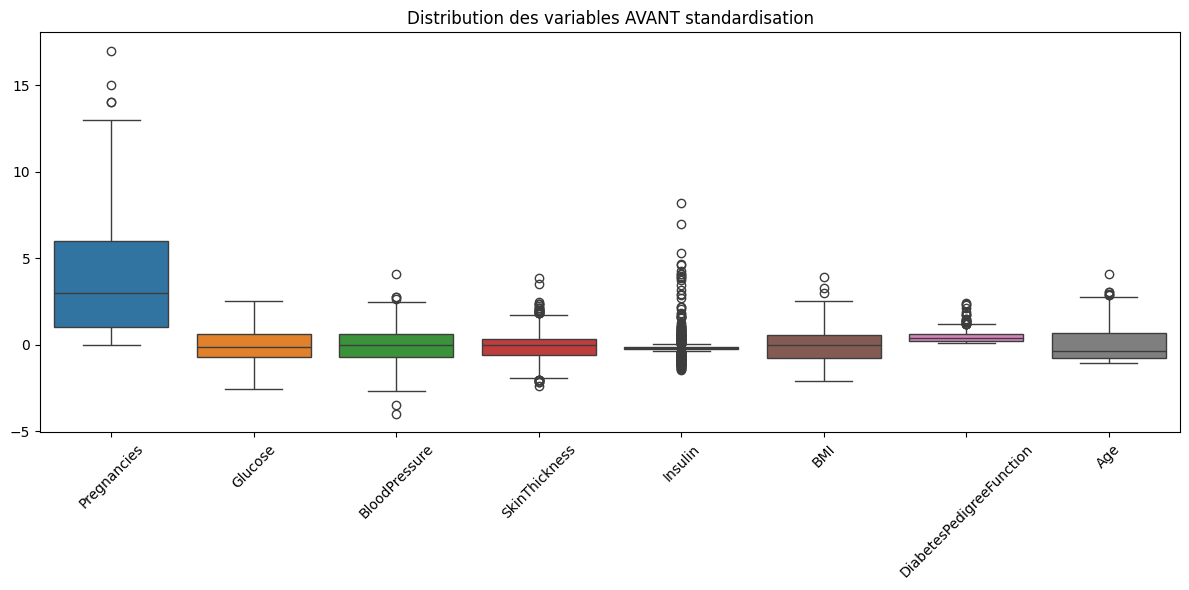

In [12]:
# Distribution des variables originales (avant standardisation)
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.title("Distribution des variables AVANT standardisation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


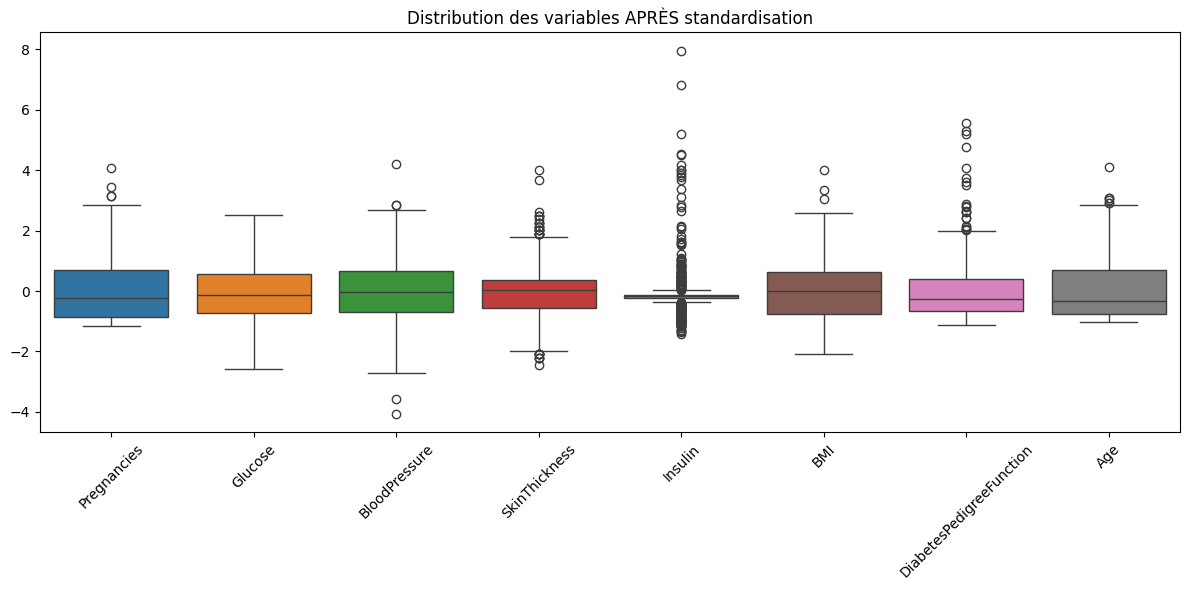

In [13]:
# Distribution des variables standardisées (après standardisation)
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_scaled_df)
plt.title("Distribution des variables APRÈS standardisation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 6. Gestion du désequilibre:

In [14]:
# Exemple avec la régression logistique
model_balanced = LogisticRegression(class_weight='balanced', random_state=0)
model_balanced.fit(X_train_scaled_df, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


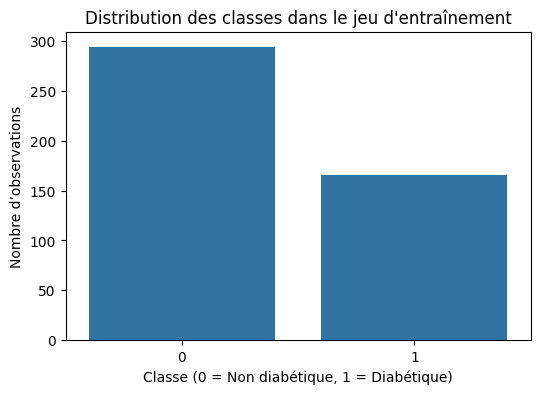

In [15]:
# Barplot du déséquilibre des classes
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Distribution des classes dans le jeu d'entraînement")
plt.xlabel("Classe (0 = Non diabétique, 1 = Diabétique)")
plt.ylabel("Nombre d’observations")
plt.show()

In [16]:
# Gestion du déséquilibre via les poids de classe
model = LogisticRegression(class_weight='balanced', random_state=0)
model.fit(X_train_scaled_df, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# 7. Modelisation initiale

In [17]:
# --- Entraînement du modèle de régression logistique avec gestion du déséquilibre ---
logreg_model = LogisticRegression(class_weight='balanced', random_state=0)
logreg_model.fit(X_train_scaled_df, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
# --- Prédictions sur le jeu de validation ---
y_val_pred = logreg_model.predict(X_val_scaled_df)

In [19]:
# --- Évaluation des performances sur le jeu de validation ---
val_accuracy  = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall    = recall_score(y_val, y_val_pred)
val_f1        = f1_score(y_val, y_val_pred)

In [20]:
# --- Affichage des résultats ---
print("Évaluation sur le jeu de validation :")
print(f"Accuracy  : {val_accuracy:.4f}")
print(f"Precision : {val_precision:.4f}")
print(f"Recall    : {val_recall:.4f}")
print(f"F1 Score  : {val_f1:.4f}")

Évaluation sur le jeu de validation :
Accuracy  : 0.7468
Precision : 0.5902
Recall    : 0.7200
F1 Score  : 0.6486


# 8. Evaluation finale

In [21]:
# --- Prédictions sur le set de test ---
y_test_pred = logreg_model.predict(X_test_scaled_df)


In [22]:
# --- Évaluation sur le set de test ---
test_accuracy  = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall    = recall_score(y_test, y_test_pred)
test_f1        = f1_score(y_test, y_test_pred)


In [23]:
# --- Affichage des métriques de performance sur le test set ---
print("Évaluation finale sur le jeu de test :")
print(f"Accuracy  : {test_accuracy:.4f}")
print(f"Precision : {test_precision:.4f}")
print(f"Recall    : {test_recall:.4f}")
print(f"F1 Score  : {test_f1:.4f}")

Évaluation finale sur le jeu de test :
Accuracy  : 0.7468
Precision : 0.6102
Recall    : 0.6923
F1 Score  : 0.6486


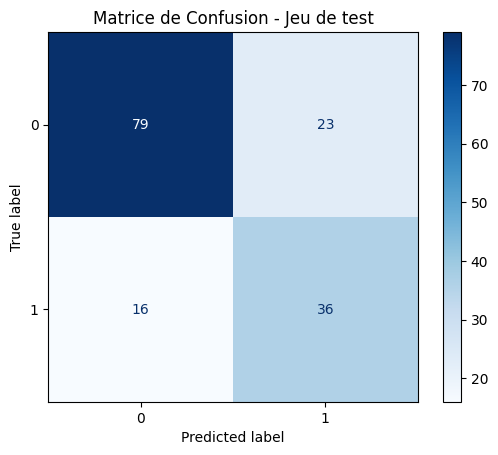

In [24]:
# --- Matrice de confusion ---
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logreg_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confusion - Jeu de test")
plt.show()

# 9. Explainability : Importance des variables + Analyse des erreurs

In [25]:
# Récupération des coefficients du modèle
coefficients = logreg_model.coef_[0]

# Création d’un DataFrame pour une meilleure visualisation
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Affichage des coefficients triés
print("Importance des variables (régression logistique) :")
display(feature_importance)


Importance des variables (régression logistique) :


,Feature,Coefficient
1,Glucose,1.119215
5,BMI,0.739827
7,Age,0.392591
0,Pregnancies,0.263565
6,DiabetesPedigreeFunction,0.117113
3,SkinThickness,0.037055
4,Insulin,0.032720
2,BloodPressure,-0.150607


/tmp/ipykernel_157207/3773265781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')


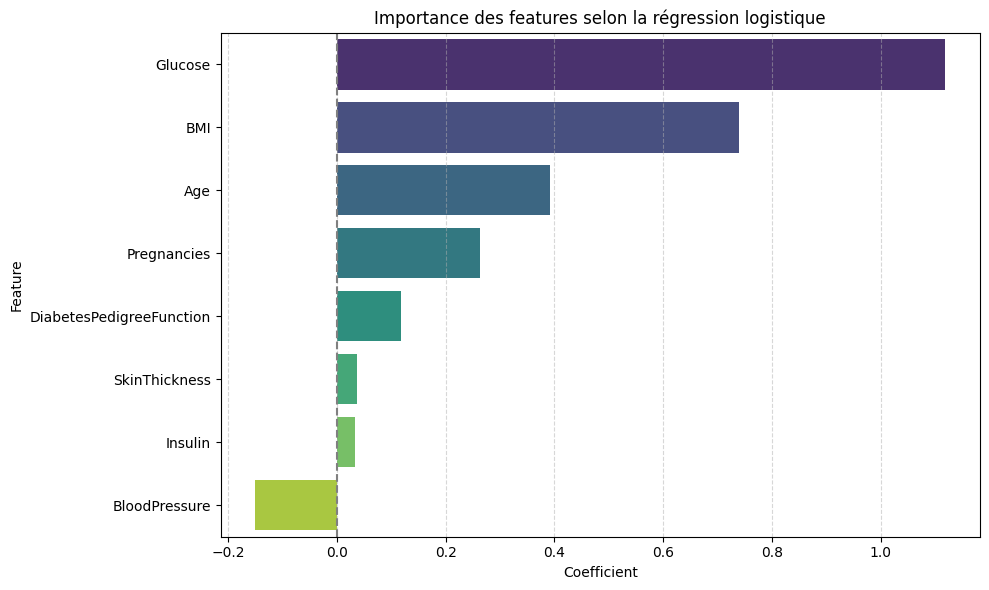

In [26]:
# Affichage avec barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')
plt.title("Importance des features selon la régression logistique")
plt.axvline(x=0, color='gray', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [27]:
# Calcul des éléments de la matrice de confusion
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("Analyse des erreurs :")
print(f"Faux Positifs (FP) : {fp}")
print(f"Faux Négatifs (FN) : {fn}")
print(f"Vrais Positifs (TP) : {tp}")
print(f"Vrais Négatifs (TN) : {tn}")


Analyse des erreurs :
Faux Positifs (FP) : 23
Faux Négatifs (FN) : 16
Vrais Positifs (TP) : 36
Vrais Négatifs (TN) : 79


# 10. Conclusions : Synthèse de la performance et recommandations pour le déploiement/collecte de données.

Le modèle de régression logistique montre une bonne capacité à prédire la présence de diabète.

Les variables comme Glucose, BMI et Age sont les plus importantes pour le modèle.

Le déséquilibre des classes a été pris en compte via le paramètre class_weight='balanced'.

Le nettoyage des données et la standardisation ont amélioré la qualité des prédictions.

Pour aller plus loin, il serait utile de collecter davantage de données et de continuer à suivre la performance du modèle dans le temps